## Assume that you have been assigned a task of test driving to check on signal strengths of three BTSs in Garrissa, Wajir and Mandera towns (1 BTS per town). You are required by your supervisor to estimate the cost of such a travel and to come up with a travel plan. You have the following parameters to incorporate in your cost model:

a.	Mileage allowance as per AA rates for Kenya. Use those for FY2018.
b.	Fuel consumption per km. Assume the company only uses long chase Land cruisers.
c.	Accommodation of not more than 7,000/= per night spent.
d.	Standard per diem rate of 8,000/= per night spent.
Required 
1.	Modify the above code to incorporate the solution to this problem
2.	Report (max 3 pages)
a.	Travel plan with total cost of travel
b.	Map showing the proposed routes of travel
i.	Matplotlib 
ii.	QGIS [throw in your favorite basemap to enrich the background]
c.	Python script for generating the routes
d.	Comparison of pythonic results and those from maps.google.com 
e.	Alternative strategies for reducing the cost


In [1]:
import googlemaps # Connection to Google API
import polyline # Decoding google routes into series of x'S and y's
from datetime import datetime
from matplotlib import pyplot as plt #Plotting the resultant route
import numpy as np
import shapefile as shp
%matplotlib inline

In [3]:
shp_path = 'ke_county.shp'
sf = shp.Reader(shp_path)

In [6]:
len(sf.shapes())

47

In [7]:
with open("api.txt", "r") as apikey:
    #Connects to the Google Maps API
    gmaps = googlemaps.Client(apikey.read())

In [8]:



#origin0 = (-1.258930, 36.785815) 
#destination_1= (-0.45382, 39.64275) ##Garissa Exchange
#destination_2 = (-1.746428, 40.05296) ## Wajir Baraza Park

## From HQ 1 to Garissa Exchange
result_1 = gmaps.directions(origin= "-1.258930, 36.785815", destination = "-0.45382, 39.64275", mode= 'driving', departure_time=datetime.now())

## From Garissa Exchange to Wajir Baraza Park
result_2 = gmaps.directions(origin= "-0.45382, 39.64275", destination = "1.746428, 40.05296",  mode= 'driving', departure_time=datetime.now())

## From Wajir to Mandera
result_3 = gmaps.directions(origin= "1.746428, 40.05296", destination = "3.932806, 41.85686",  mode= 'driving', departure_time=datetime.now())

## From Mandera back to HQ 1
result_4 = gmaps.directions(origin= "3.932806, 41.85686", destination = "-0.45382, 39.64275",  mode= 'driving', departure_time=datetime.now())

In [9]:
dist = result_1[0]['legs'][0]['distance']['text']
time_1 = result_1[0]['legs'][0]['duration']['text']
line_1 = polyline.decode(result_1[0]['overview_polyline']['points'])
#To plot on Matplotlib, we invert the coordinates into (x,y) format rather than y,x


#Inverting for result_2- Garissa Exchange to Wajir Baraza Park
dist_2 = result_2[0]['legs'][0]['distance']['text']
time_2 = result_2[0]['legs'][0]['duration']['text']
line_2 = polyline.decode(result_2[0]['overview_polyline']['points'])

#Inverting for result_3- Wajir Baraza Park to Mandera Township

dist_3 = result_3[0]['legs'][0]['distance']['text']
time_3 = result_3[0]['legs'][0]['duration']['text']
line_3 = polyline.decode(result_3[0]['overview_polyline']['points'])

#Inverting for Mandera to HQ 1
dist_4 = result_4[0]['legs'][0]['distance']['text']
time_4 = result_4[0]['legs'][0]['duration']['text']
line_4 = polyline.decode(result_4[0]['overview_polyline']['points'])


xs_1 = [xy[1] for xy in line_1]
ys_1 = [xy[0] for xy in line_1]

xs_2 = [xy[1] for xy in line_2]
ys_2 = [xy[0] for xy in line_2]

xs_3 = [xy[1] for xy in line_3]
ys_3 = [xy[0] for xy in line_3]

xs_4 = [xy[1] for xy in line_4]
ys_4 = [xy[0] for xy in line_4]



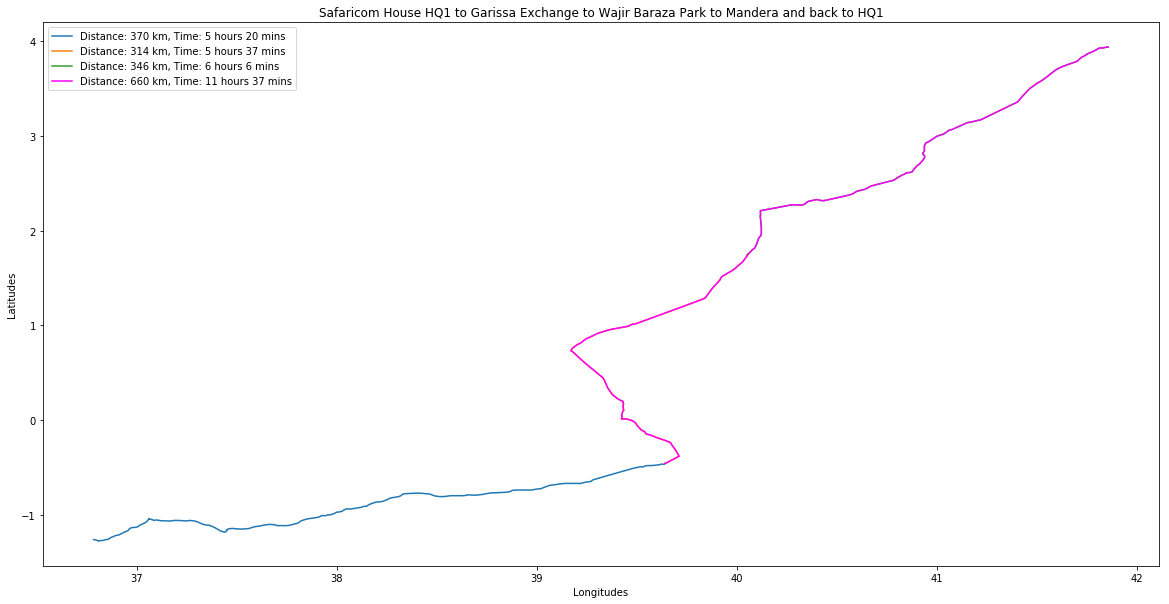

In [15]:
from matplotlib.pyplot import figure
plt.figure(figsize=(20,10))


plt.plot(xs_1, ys_1, label = "Distance: {}, Time: {}". format(dist, time_1))
plt.plot(xs_2, ys_2, label = "Distance: {}, Time: {}". format(dist_2, time_2))
plt.plot(xs_3, ys_3, label = "Distance: {}, Time: {}". format(dist_3, time_3))
plt.plot(xs_4, ys_4, label = "Distance: {}, Time: {}". format(dist_4, time_4), color= 'magenta')
plt.title("Safaricom House HQ1 to Garissa Exchange to Wajir Baraza Park to Mandera and back to HQ1")
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.legend()

In [20]:
## total distance covered 
print(dist)

print(dist_2)
print(dist_3)
print(dist_4)

370 km
314 km
346 km
660 km


In [10]:
print(dist_3)

346 km
